## Homework 5 (Due Thur 2/22)

**Learning Objectives:**

- Apply Python commands and constructs learned in class. (Code)
- Use Python to simulate demand data in various kinds of business settings. (Analyze)

## 1. Loops and conditional statements

Use a `for` loop to iterate over a given list of tuples of three numbers each, and judge whether the sum of the first two numbers in each tuple is equal to the third. If it is correct, write it is correct, otherwise, write it is not. For example, if the input is

```python
inputList=[(1,3,5),(1,1,2),(4,5,9),(2,2,6)]
```

The output should be as follows.

```
1+3 is NOT equal to 5
1+1 is EQUAL to 2
4+5 is EQUAL to 9
2+2 is NOT equal to 6
```

**Hints:**
A tuple is a list of fixed length, indicated by parenthesis. For example `t=(3,5,6)` is a tuple of three elements. We can index a tuple like a list, so `t[0]=3`, `t[1]=2`, etc. Furthermore, we can do multiple assignments to a tuple as with a list, so
```python
a,b,c=t
```
would set `a` to be 3, `b` to be 5, and `c` to be 6.

We can iterate through a list using `for` loop as
```python
listEx=['a',[3,4],6]
for element in listEx:
    print(element)
```
will print the elements of the list in order. The first element is `listEx[0]='a'`, second is `listEx[1]=[3,4]` and so on. You can check whether two numbers sum to the third using an `if` statement. For example, the following code
```python
if a>0:
    print('Positive')
elif a<0:
    print('Negative')
else:
    print('Zero')
```
will decide what to print based on the comparison of `a` and zero. Finally you can format your printing using `str.format`. For example
```python
name='Bob'
age=30
print('{0} is {1} years old'.format(name,age))
```
will print Bob is 30 years old. The `{0}` means that we should replace with the zeroth argument in format, which is name, and `{1}` means that we should replace with the second.

In [ ]:
inputList=[(1,3,5),(1,1,2),(4,5,9),(2,2,6)]
# Write your code below


In [2]:
# Correct output

1+3 is NOT equal to 5
1+1 is EQUAL to 2
4+5 is EQUAL to 9
2+2 is NOT equal to 6


## 2. String splitting and joining

Write a function `nameFormat` that changes an input name in the "Last, First" format to the "First Last" format. An example input to the function would be
```python
nameExample='Shi, Peng'
```
The output of running `nameFormat(nameExample)` should be
```
Peng Shi
```
Your function should be able to handle extraneous white space around the first and last name. For example ` Shi ,  Peng` should yield the same answer as above, as well as `Shi,Peng`. 

Furthermore, if there is a middle name given, you should output the middle initial inside. For example the code
```python
nameExample2='Doe, Jack Beverly James'
print(nameFormat(nameExample2))
```
should yield the result
```
Jack B. Doe
```
For simplicity, you can assume that the input is properly capitalized.

**Hints:** 
See the `str.split`, `str.join`, `str.strip` and string indexing methods in the course notes for 2/13. You will also need to use the `len()` method to find out the length of the list of names behind the comma (after splitting it with space), as well as an if statement to check whether there is a middle name to initial or not. 

In [ ]:
def nameFormat(inputName):
    # Write your code here
    
# Testing
print(nameFormat('Shi, Peng'))
print(nameFormat(' Shi,Peng'))
print(nameFormat(' Shi  ,   Peng  '))
print(nameFormat('Doe, Jack Beverly James'))
 

In [3]:
# Correct output

Peng Shi
Peng Shi
Peng Shi
Jack B. Doe


## 3. Optimizing a function by enumeration

In the lab 2 solutions, as well as in the course notes to simulation modeling, we optimize over a single dimensional function by searching over a range of parameters, and obtaining the best parameter. In this problem, you will create a generic function called `findMin` that does exactly this. For example, given the input

```python
def f(x):
    return (x-3)**2+1
domain=[2,3,5,8]
```
The command `xBest=findMin(f,domain)` should set `xBest` to `3`, which is what minimizes the function in the given domain. Once you are done, you should test your function by changing `f` and `domain`. If there are multiple parameters within the domain that achieve the minimum value, then you can return any of them.

**Hints:**
One way of doing this is to iterate through the domain with a `for` loop, compute the value `f(x)` for each `x`, and keep track of what is the best found so far. (See the Lab 2 solutions, `analyzeRM1` function for an example.)

Another way is to use list comprehension to obtain a list of values, and obtain the index of the minimum element. (See course notes for 2/13, as well as the `analyzePrice` function in Lab 2 solutions.)



In [ ]:
def f(x):
    return (x-3)**2+1
domain=[2,3,5,8]

def findMin(f,domain):
    # complete your code here
    
# Testing
print('The minimum of function in domain {0} is {1}.'.format(domain,findMin(f,domain)))

In [4]:
# Correct output

The minimum of function in domain [2, 3, 5, 8] is 3


## 4. Generating random numbers and plotting histogram

In this exercise, you will use the `scipy.stats` package to generate normal and general discrete samples, in order to plot the shape of the probability distributions of the daily earnings from using Rockport in the example in DMD 5.1 (from pre-class readings). Simulate 10000 samples and plot the frequency instead of the density. You should also include the proper titles and labels of the x and y axis.

**Hints:**
See page 196-197 in DMD for description of the distribution. It has the form $price*min(demand,3500)-10000$, where price is normally distributed, demand follows a discrete distribution. You should make the price zero whenever you get a negative sample.

You can use the `norm` and `rv_discrete` modules from `scipy.stats` (see course notes to probability distributions and simulation modeling sessions). To sample, use `rvs()` with the proper `size` parameter. Then you can manipulate the resultant numpy arrays by element wise operations. (See code examples at the end of Lab 2.) You can compute the minimum of 3500 and demand using `np.minimum` and plot the histogram using `plt.hist`. The output should look as follows (see the web version of this homework on nbviewer.jupyter.org to see the graph).

In [ ]:
from scipy.stats import norm,rv_discrete
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
# Complete your code below

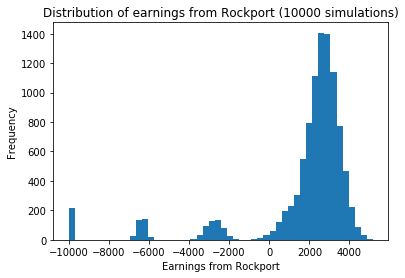

In [13]:
# Correct output

## 5. Simulating stock trading strategies

One simple model of stock pricing is that the log of daily returns follows a normal distribution. In other words, if $p_t$ is the price on day $t$, then $$log(p_t)-log(p_{t-1}) \sim Normal(\mu,\sigma).$$ Suppose at time $t=0$, you bought a share of the stock at price $p_0=1$. You plan to sell the stock on the day when it either exceeds price $a > 1$ or falls below $b<1$, which ever comes first. You would like to write a function `analyzeStrategy`, with inputs $\mu$, $\sigma$, $a$ and $b$, and outputs the expected percentage earnings.

### a) generating prices
Given the input
```python
mu=.001
sigma=.03
```
generate 1000 samples of a normal random variable with this mean and standard deviation, storing it in a numpy array called `z`. The command `np.cumsum(z)` calculates the running sum of this numpy array. The command `np.exp(inputArray)` takes the exponent of a given input array. Use these two commands in combination to produce an array of stock price `p`. Then plot it using `plt.plot(p)`, and give the proper labels to the graph. The output should look as follows.



In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
mu=.001
sigma=.03
np.random.seed(0)
# Complete your code here

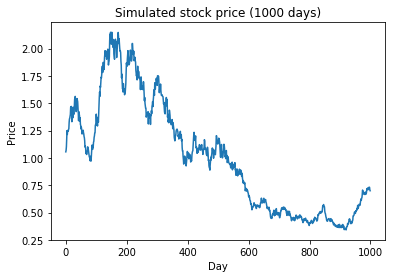

In [30]:
# Correct output

### b) calculating value of strategy
Suppose you are given the following array of prices, as well as the values of $a$ and $b$, write a function `computeEarning` to compute your percentage earnings. For example, the following input
```python
a=1.05
b=.95
p=np.array([1,1.03,1.04,1.045,0.94])
print(computeEarning(p,a,b))
```
should yield -0.06, because you bought the stock at price 1 and sold at price 0.94, so it's a 6% loss. However, the following input, 
```python
a=1.05
b=.95
p=np.array([1,1.03,1.04,1.045,0.96,1.07])
print(computeEarning(p,a,b))
```
should yield 0.07, as you sold at price 1.07. Suppose that every value in $p$ stays strictly within $a$ and $b$, then you should return 0.

**Hint:**
You can simply iterate through the given array using a for loop, and have a `if` statement to check whether the current price is at or above $a$ or at or below $b$. Whenever that happens, you should exit the loop by returning the current price minus 1. If you went through the whole loop and didn't hit any of the conditions, then return 0.


In [ ]:
import numpy as np

def computeEarning(p,a,b):
    # Complete your code here.

# Testing
a=1.05
b=.95
p=np.array([1,1.03,1.04,1.045,0.94])
print(computeEarning(p,a,b))
p=np.array([1,1.03,1.04,1.045,0.96,1.07])
print(computeEarning(p,a,b))

In [31]:
# Correct output

-0.06
0.07


### c) Putting everything together

Combine the code you have done and create a function that simulates 1000 price paths and average the result to compute the expected returns. To make things easy, you should first put the code that generates price path into a `generatePrices()` function. Then, you can use the `np.average()` function as well as list comprehension to compute the average of the `computeEarning` function evaluated on 1000 independent price paths (see course notes on 2/8 for explanation of list comprehension). As an alternative to list comprehension, you can use a for loop that generates a `p` at a time, feed it to your `computeEarning` function, and add it to a running sum. Finally, you can divide your running sum by the number of simulations to get the average. 

In [47]:
import numpy as np
np.random.seed(0)

def generatePrice(mu,sigma):
    # Adapt your code from part a) and put here
    pass

def computeEarning(p,a,b):
    # Copy your code from part b) here
    pass
    
def analyzeStrategy(mu,sigma,a,b):
    # Complete your code here
    pass
    
    
# Testing
mu=0.001
sigma=0.03
a=1.1
b=0.9
print('Expected return when mu={0}, sigma={1}, a={2}, b={3} is {4:.3f}.'.format(mu,sigma,a,b,analyzeStrategy(mu,sigma,a,b)))


Expected return when mu=0.001, sigma=0.03, a=1.1, b=0.9 is None.


In [45]:
# Correct output

Expected return when mu=0.001, sigma=0.03, a=1.1, b=0.9 is 0.021.


## 6. Fun with Numpy

This question gives you additional practice working with `numpy` arrays, which help you to code complex computations over many numbers using very short syntax. They are more confusing than loops and if statements to think about but once you master them it will make you able to code fast and make the code itself run faster.

**a)** Create an array of 20 exponentially distributed numbers with parameter $scale=2$. You can do this using `scipy.stats.expon` module (just as you generate normal random variables.) Then use `np.cumsum` to compute an array of running totals, calling it `x`. Print this array, then plot it using `plt.plot` by making it the x values, and set the y values to a numpy array `[1,2,3,...,20]` created using `np.arange`. The output should look like th  below. (The array `x` simulates the arrival time stamp of customers to a queue, assuming that on average about 1 customer arrives every 2 minutes. Having exponentially distributed inter-arrival times is called a Poisson process.)

In [ ]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

np.random.seed(0)
#Complete your code here


[  1.59174902   4.10361054   5.95005683   7.52445914   8.62655612
  10.70287471  11.85391311  16.30096193  22.9307863   23.8979905
  27.03578278  28.541131    30.21999669  35.416505    35.56387571
  35.74619777  35.78704894  39.3620243   42.37359277  46.45422133]


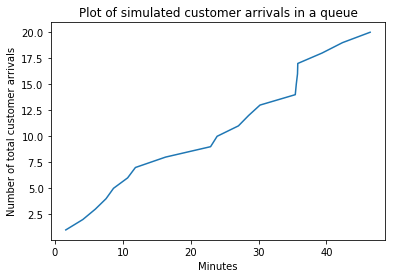

In [53]:
# Correct output

**b)** Stack this array vertically with an array of ones, created with the same length. (Use the `np.vstack`, `np.ones` and `len` methods.) Print the shape of this array to make sure it is `(2,20)` (2 rows and 20 columns), then print the array itself. Call this array `y1`. 

In [55]:
# Correct output

(2, 20)
[[  1.59174902   4.10361054   5.95005683   7.52445914   8.62655612
   10.70287471  11.85391311  16.30096193  22.9307863   23.8979905
   27.03578278  28.541131    30.21999669  35.416505    35.56387571
   35.74619777  35.78704894  39.3620243   42.37359277  46.45422133]
 [  1.           1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.           1.
    1.           1.        ]]


**c)** Generate another array of 20 numbers, this time uniformly distributed between 10 and 40, and add this to the array `x` from part a), then vstack it with an array of -1's. Call the final array `y2`

In [ ]:
from scipy.stats import uniform

#complete your code below

In [66]:
# Correct output

[[ 31.92624512  22.20384974  38.0058775   46.39011549  26.08915043
   37.98759474  39.61517105  43.46851911  39.62323528  62.48046085
   50.44954414  63.93339117  61.20437495  54.33961353  69.9778103
   57.64136999  72.22014486  66.80021048  78.82565362  77.23016903]
 [ -1.          -1.          -1.          -1.          -1.          -1.
   -1.          -1.          -1.          -1.          -1.          -1.
   -1.          -1.          -1.          -1.          -1.          -1.
   -1.          -1.        ]]


**d)** Now horizontally stack `y1` from part b) with `y2` from part c, and sort by the first row using `argsort`. (See Lab 2 solutions and explanations in Course Notes for 2/8). After sorting, replace the second row (of 1's and -1's) with its cumsum. Call the final array `y`. The answer should look something like below

In [67]:
# Correct output

[[  1.59174902   4.10361054   5.95005683   7.52445914   8.62655612
   10.70287471  11.85391311  16.30096193  22.20384974  22.9307863
   23.8979905   26.08915043  27.03578278  28.541131    30.21999669
   31.92624512  35.416505    35.56387571  35.74619777  35.78704894
   37.98759474  38.0058775   39.3620243   39.61517105  39.62323528
   42.37359277  43.46851911  46.39011549  46.45422133  50.44954414
   54.33961353  57.64136999  61.20437495  62.48046085  63.93339117
   66.80021048  69.9778103   72.22014486  77.23016903  78.82565362]
 [  1.           2.           3.           4.           5.           6.
    7.           8.           7.           8.           9.           8.
    9.          10.          11.          10.          11.          12.
   13.          14.          13.          12.          13.          12.
   11.          12.          11.          10.          11.          10.
    9.           8.           7.           6.           5.           4.
    3.           2.           1.

**e)** Put everything you have written into a function `simulateQueue`, which takes as input a parameter `n`, which replaces the length 20 of the arrays, and outputs the final array `y` from part d). Evaluate this function with `n=500` Plot the first 800 columns of this array, setting the x value to be the first row and the y value to be the second row. Title it 'Simulation of number of customers in large call center', with horizontal label 'Minutes' and vertical label 'Number of active customers.' The data you have generated has the first row corresponding to time stamps and the second row corresponding to the number of remaining customers. It assumes that customers arrive with any moment as likely as any other (so the total number of customers within say 30 minutes will be Poisson distributed), and that each customer stays in the system with a uniformly random amount of time between 10 and 40 minutes. The average height of the area under the curve corresponds to the average # of customers in the system at a random time. The maximum height corresponds to the peak # of customers. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform,expon
np.random.seed(0)

def simulateQueue(n):
    # Adapt your code from parts a) to d) and put here.
    pass

queue=simulateQueue(500)[:800,:]
# plot x=first row of queue and y=second row of queue.

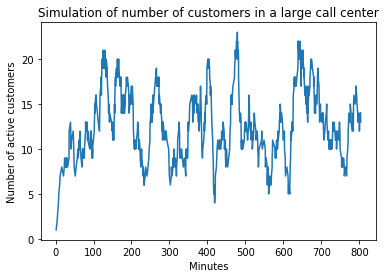

In [70]:
# Correct output